## Imports

In [7]:
%run models/__init__.py

In [8]:
%run utils.py

In [9]:
%run utilsT.py

In [10]:
%run utilsTesting.py

In [11]:
%run -n train.py

In [12]:
device = get_torch_device(gpu=False)
device

device(type='cpu')

## Load model

In [13]:
run_name = "1121_180210_resnet_v3_wd0.5_Cardiomegaly"

In [14]:
model, model_name, optimizer, opt_name, loss_name, loss_params, chosen_diseases = load_model(BASE_DIR, run_name)
model = model.to(device)

In [15]:
_ = model.train(False)

## Load data

In [16]:
BATCH_SIZE = 4

In [17]:
%%time
dataset, dataloader = prepare_data(DATASET_DIR, "test", utils.ALL_DISEASES, BATCH_SIZE, max_images=None)
n_images, n_diseases = dataset.size()
n_images, n_diseases

CPU times: user 47.4 s, sys: 396 ms, total: 47.8 s
Wall time: 48.3 s


(25596, 14)

## Load confusion matrix

In [20]:
train_cms = np.load(CMS_DIR + "/" + run_name + "_train.npy") # train, val or all
train_cms.shape

(1, 2, 2)

In [21]:
val_cms = np.load(CMS_DIR + "/" + run_name + "_val.npy") # train, val or all
val_cms.shape

(1, 2, 2)

In [22]:
n_diseases, _, _ = train_cms.shape
n_diseases

1

Left: training
Right: validation


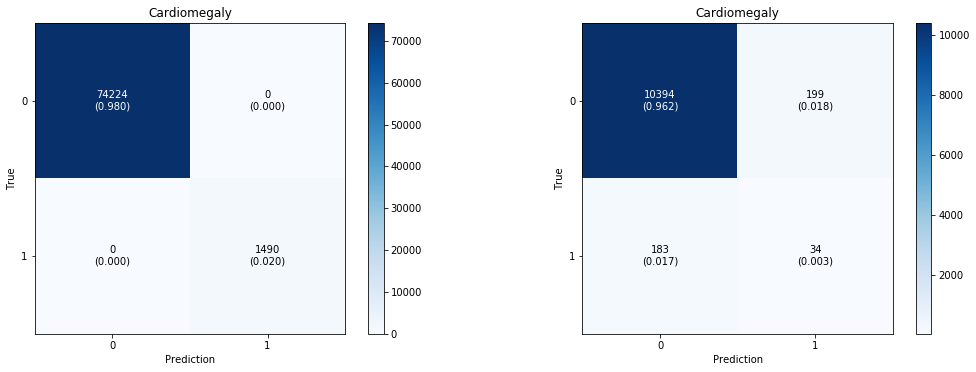

In [23]:
classes = [0, 1] # negative, positive

plt.figure(figsize=(18,80/14 * n_diseases))
plot_train_val_cms(train_cms, val_cms, classes, chosen_diseases, percentage=True)

## Plot activations and bboxes

Use confusion matrix with names (i.e. choose true positive examples, false positive, etc)

In [25]:
%run utils.py
%run utilsTesting.py

In [18]:
def get_cms_names(run_name, disease_name):
    fname = CMS_DIR + "/" + run_name + "_test_names"

    TP, FP, TN, FN, cm = load_cms_names(fname, disease_name)
    print(cm)
    return TP, FP, TN, FN, cm

In [19]:
def calculate_plot_activations(image_name, disease_name=None):
    image, gt, prediction, bboxes, activation = gen_image_with_bbox(model,
                                                                dataset,
                                                                image_name,
                                                                chosen_diseases,
                                                                device,
                                                               )
    plt.figure(figsize=(15, 5))

    plt.subplots_adjust(wspace=0.5)
    plt.subplot(1, 2, 1)
    plot_image_with_bbox(image, image_name, bboxes)
    
    plt.subplot(1, 2, 2)
    plot_activation(activation, prediction, gt, chosen_diseases, disease_name=disease_name)
    
    # FIXME: this is copied from plot_activation()
    if disease_name is None:
        disease_name = chosen_diseases[0]

    disease_index = chosen_diseases.index(disease_name)

    pred = prediction[disease_index]
    
    print("Ground truth: {} {}".format(disease_name, gt[disease_index]))
    print("Prediction: {:.4f}".format(pred))

In [20]:
def plot_multiple_activations(image_names, from_index, to_index, disease_name=None):
    
    # FIXME: copied from calculate_plot_activations()
    
    n_samples = to_index - from_index
    
    plt.figure(figsize=(15, 5*n_samples))
    
    if disease_name is None:
        disease_name = chosen_diseases[0]

    disease_index = chosen_diseases.index(disease_name)


    for index in range(from_index, to_index):
        image_name = image_names[index]
        
        image, gt, prediction, bboxes, activation = gen_image_with_bbox(model,
                                                                        dataset,
                                                                        image_name,
                                                                        chosen_diseases,
                                                                        device,
                                                                       )
        
        plt.subplots_adjust(wspace=0.5)
        plt.subplot(n_samples, 2, 1 + (index - from_index)*2)
        plot_image_with_bbox(image, image_name, bboxes)

        plt.subplot(n_samples, 2, 2 + (index - from_index)*2)
        plot_activation(activation, prediction, gt, chosen_diseases, disease_name=disease_name)
        
        pred = prediction[disease_index]
        plt.title("{} ({}, {:.4f})".format(disease_name, gt[disease_index], pred))

### Cardiomegaly examples

In [15]:
run_name = "1121_180210_resnet_v3_wd0.5_Cardiomegaly"

In [17]:
model, model_name, optimizer, opt_name, loss_name, loss_params, chosen_diseases = load_model(BASE_DIR, run_name)
model = model.to(device)
_ = model.train(False)

In [21]:
TP, FP, TN, FN, cm = get_cms_names(run_name, "Cardiomegaly")

[[24048   479]
 [  852   217]]


Ground truth: Cardiomegaly 1
Prediction: 1.0000


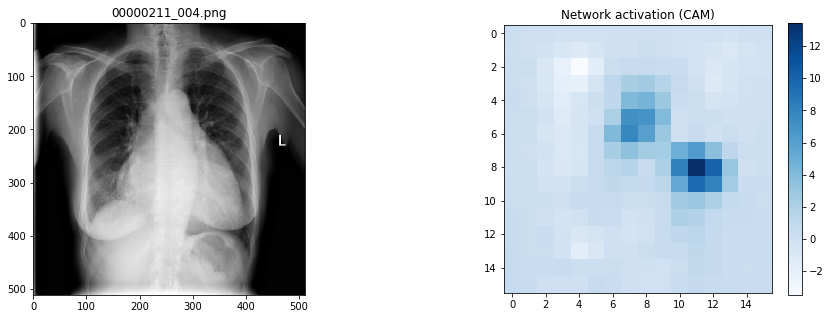

In [27]:
calculate_plot_activations(TP[2])

Ground truth: Cardiomegaly 1
Prediction: 0.9994


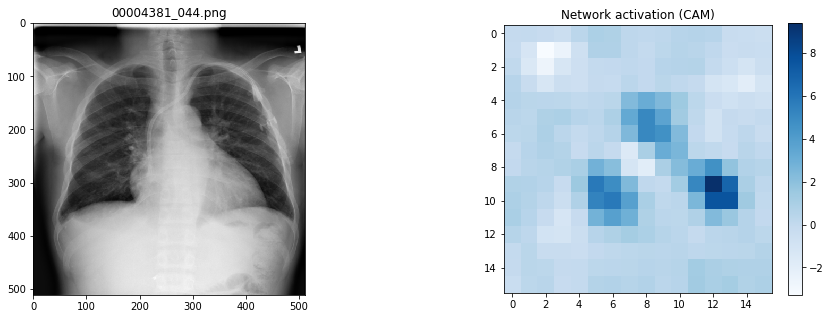

In [55]:
calculate_plot_activations(TP[60])

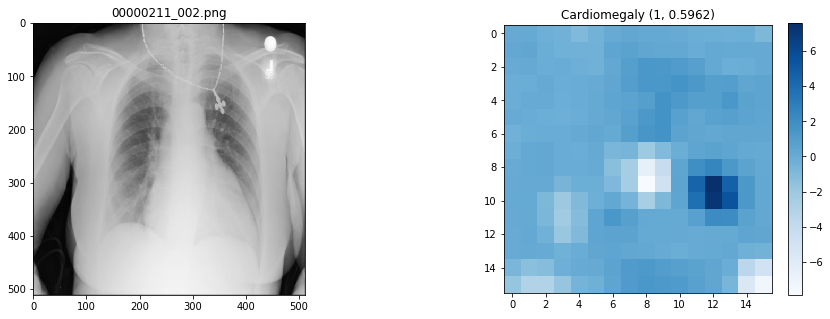

In [17]:
calculate_plot_activations(TP[1])

Ground truth: Cardiomegaly 1
Prediction: 0.0579


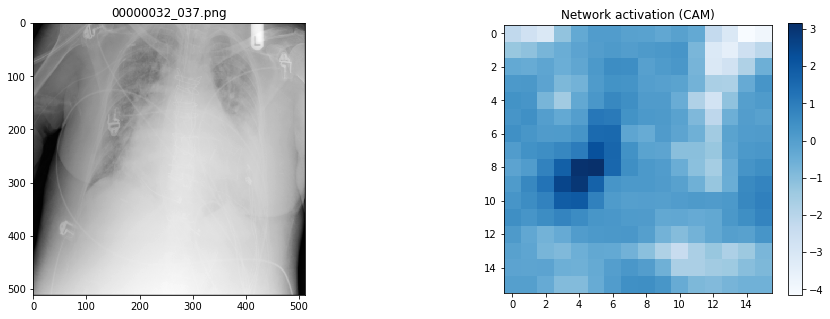

In [22]:
calculate_plot_activations(FN[20])

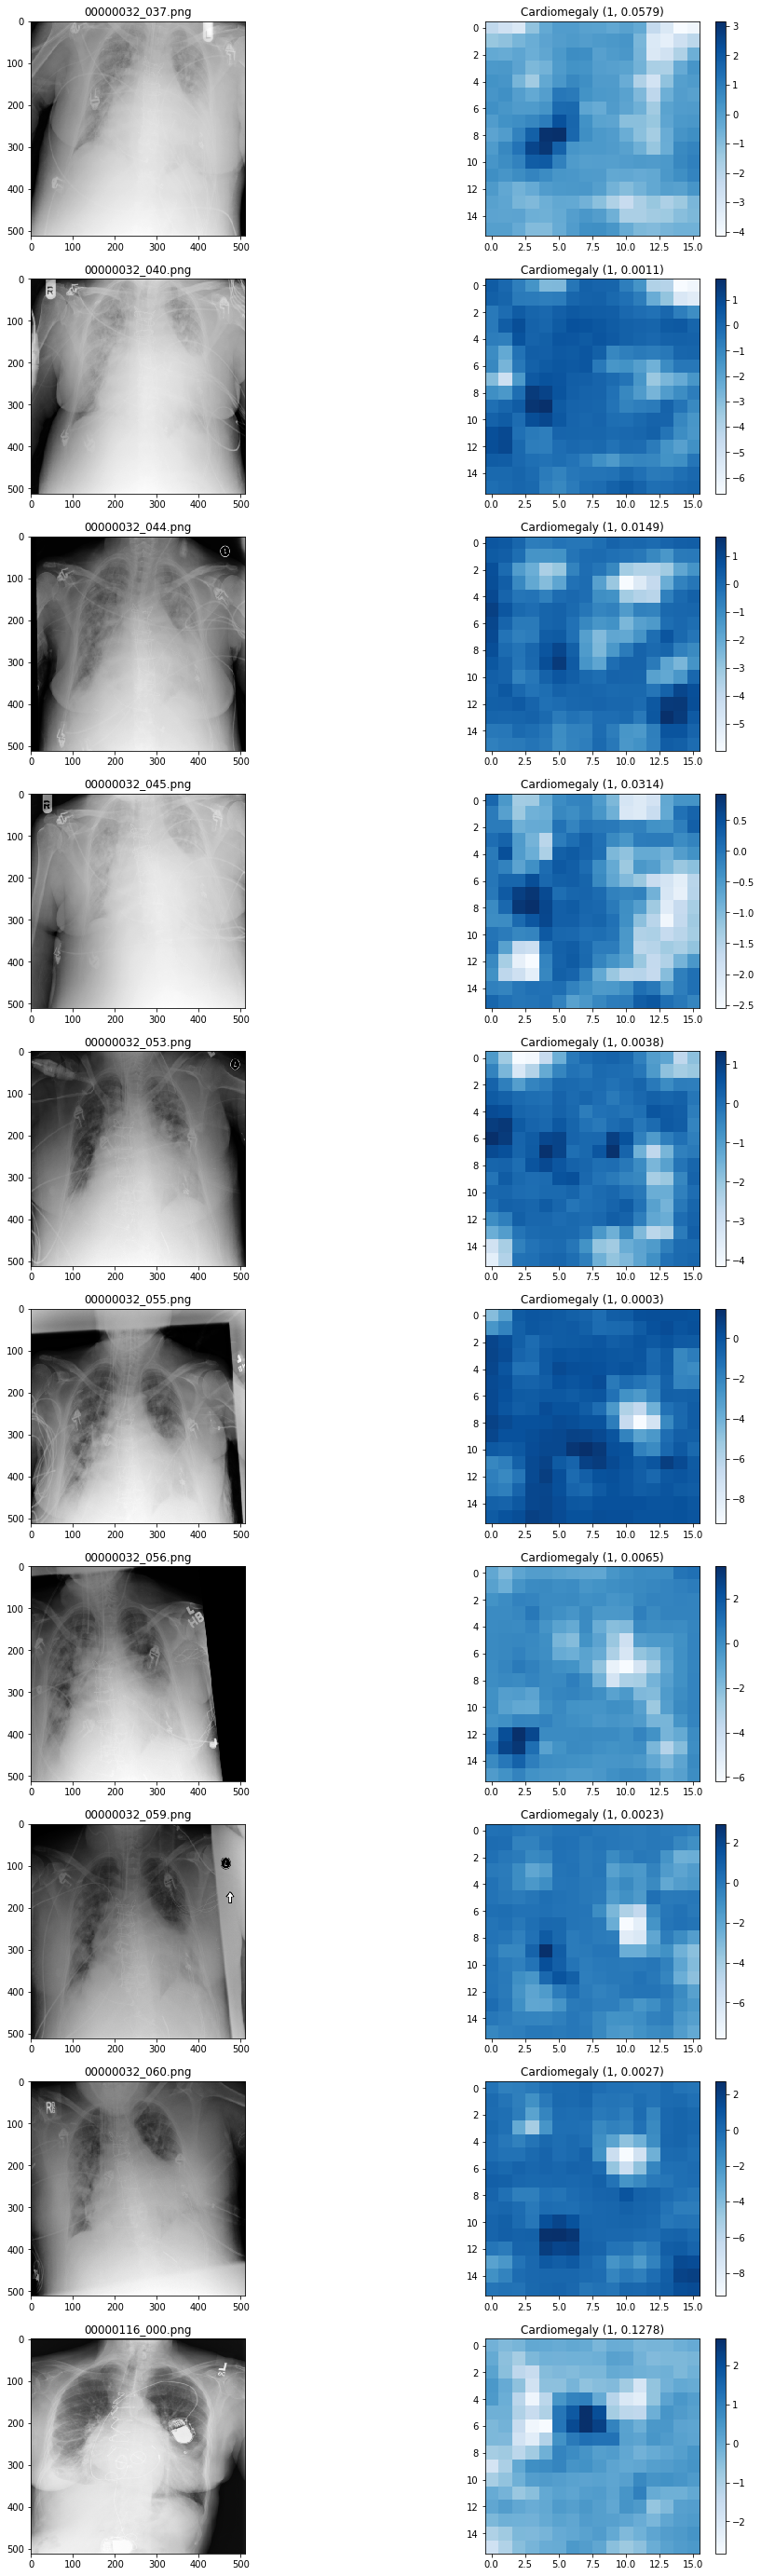

In [25]:
plot_multiple_activations(FN, 20, 30)

Ground truth: Cardiomegaly 1
Prediction: 0.0061


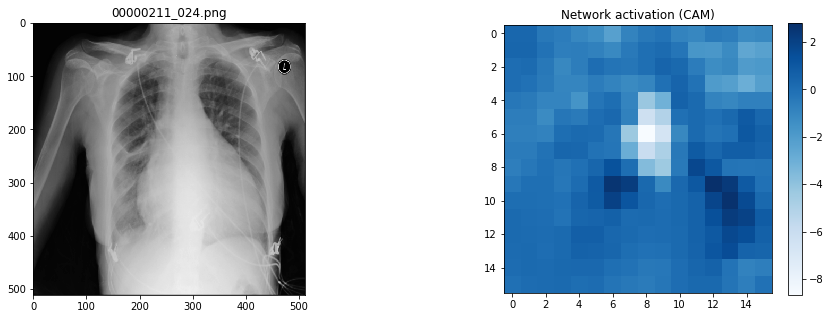

In [23]:
calculate_plot_activations("00000211_024.png")

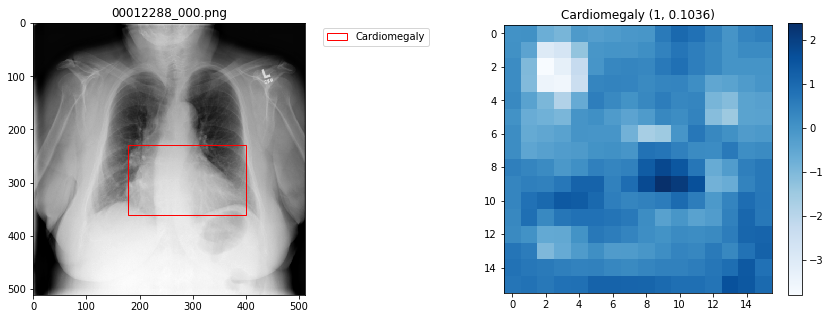

In [107]:
calculate_plot_activations("00012288_000.png")

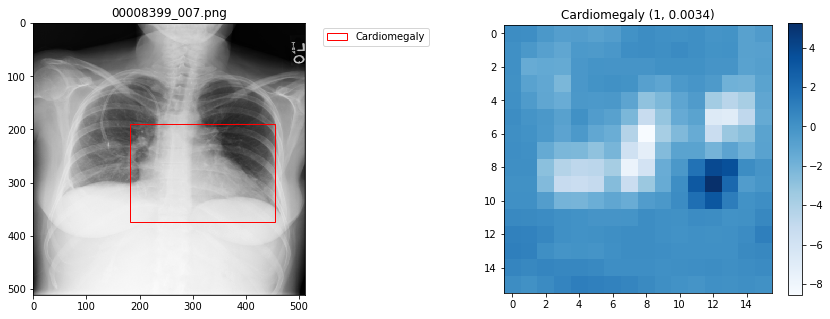

In [108]:
calculate_plot_activations("00008399_007.png")

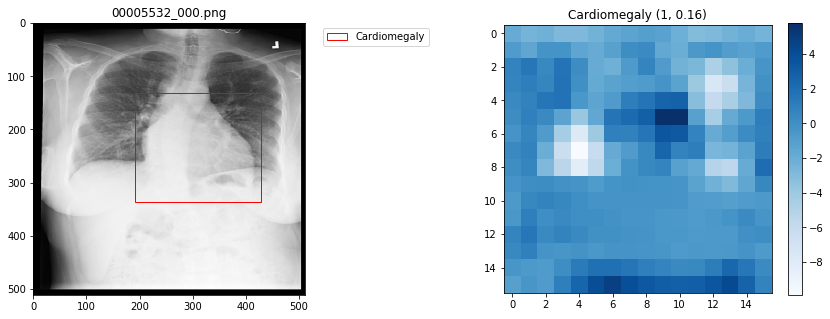

In [65]:
calculate_plot_activations("00005532_000.png")

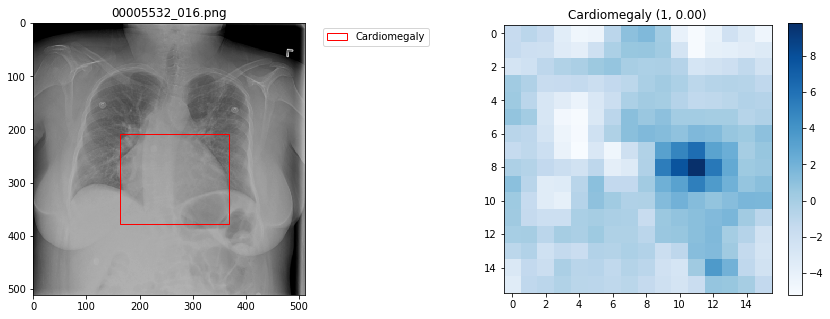

In [67]:
calculate_plot_activations("00005532_016.png")

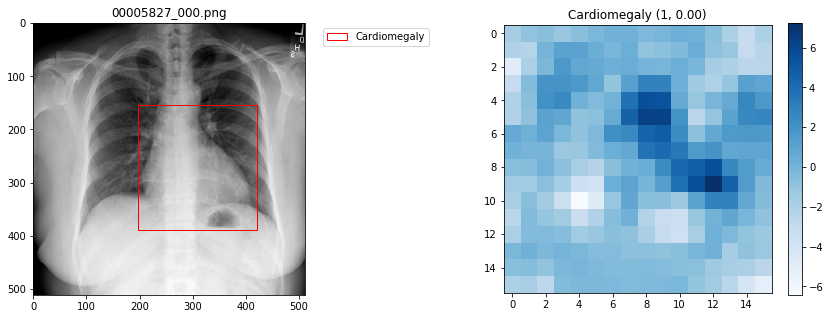

In [68]:
calculate_plot_activations("00005827_000.png")

### Pneumothorax examples

In [20]:
run_name = "1127_035613_resnet_v3_wd0.5_Pneumothorax"

In [21]:
model, model_name, optimizer, opt_name, chosen_diseases = load_model(BASE_DIR, run_name)
model = model.to(device)
_ = model.train(False)

In [24]:
TP, FP, TN, FN, cm = get_cms_names(run_name, "Pneumothorax")

[[20950  1981]
 [ 1636  1029]]


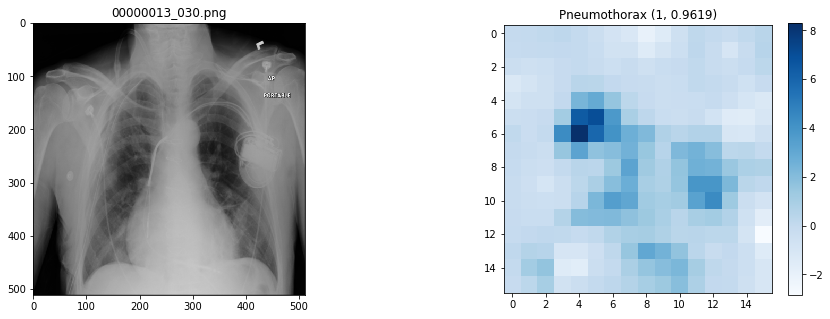

In [42]:
calculate_plot_activations(TP[5], disease_name="Pneumothorax")

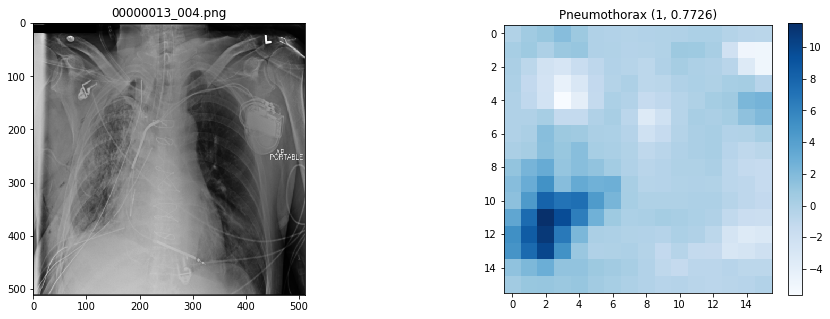

In [26]:
calculate_plot_activations(TP[1], disease_name="Pneumothorax")

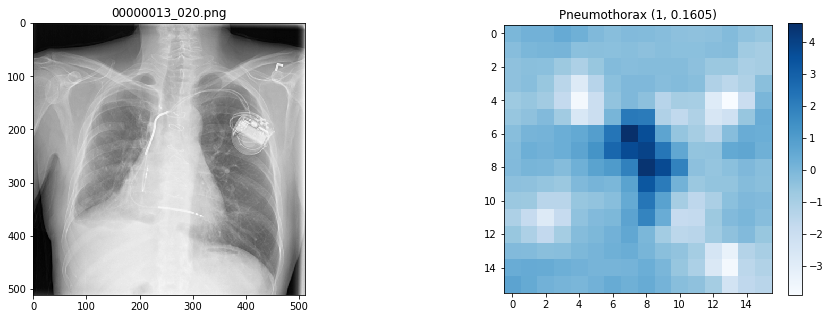

In [38]:
calculate_plot_activations(FN[4], disease_name="Pneumothorax")

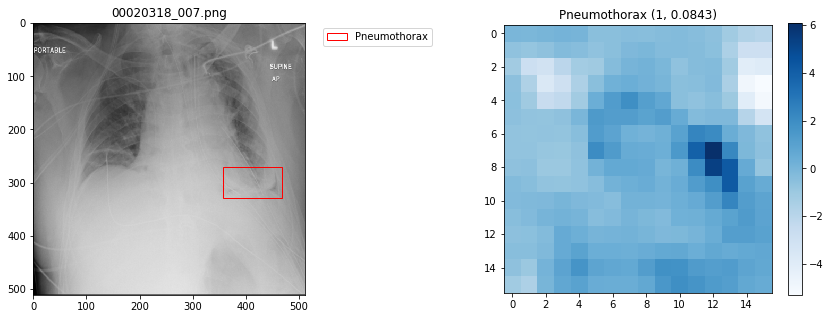

In [43]:
calculate_plot_activations("00020318_007.png", "Pneumothorax")

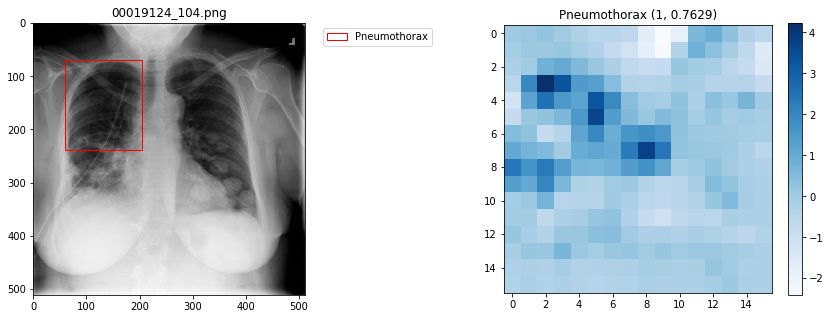

In [44]:
calculate_plot_activations("00019124_104.png", "Pneumothorax")

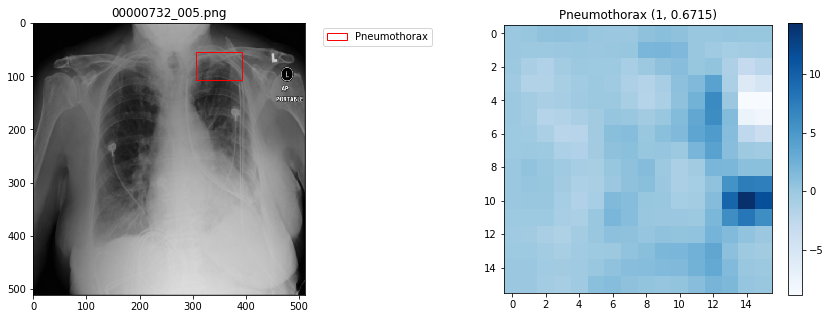

In [45]:
calculate_plot_activations("00000732_005.png", "Pneumothorax")